# Chat Logs and Summaries

### Questions 1 to 2:

##### [Link to chat log](https://chatgpt.com/share/66f629c8-58b8-8002-9b14-051a701fb569)

##### Chatbot-provided summary:
"Here's a summary of our conversation:

1. **Plotting Penguins' Flipper Length Histogram with Plotly**: 
   - You initially created a **Plotly histogram** for the variable `flipper_length_mm` categorized by penguin species. 
   - You wanted to annotate the histogram with descriptive statistics (mean, median, range, interquartile range (IQR), and range of two standard deviations) using Plotly’s shape functions (`add_hline`, `add_vline`, `add_hrect`, and `add_vrect`).
   - I provided code to annotate the histogram, but the annotations became cluttered.
   
2. **Using a Legend to Reduce Clutter in Plotly**:
   - To reduce clutter, I suggested moving the descriptive statistics annotations to a **legend** using `showlegend=True` and the `name` argument in the shape methods (`add_vline`, `add_vrect`), while also removing unnecessary text annotations. 
   - I provided the corrected Plotly code that only displayed information in the legend and removed direct text annotations from the plot.

3. **Seaborn KDE Plot Alternative**:
   - You then asked for the same histogram with the same descriptive statistics, but using **Seaborn KDE plots** arranged into a row of three subplots (one for each species). 
   - I provided a solution using **Seaborn’s KDE plots** and added annotations for the mean, median, range, IQR, and two-standard-deviation range using `axvline` and `axvspan`.

4. **IQR Not Appearing for Adelie and Gentoo**:
   - You noticed that the **IQR (purple shaded area)** only appeared for **Chinstrap** penguins and not for **Adelie** or **Gentoo**.
   - We discovered that this was due to `NaN` (missing) values in the `flipper_length_mm` column for the Adelie and Gentoo species, leading to the IQR calculation returning `NaN`.

5. **Handling Missing Data**:
   - I suggested two ways to handle the missing data:
     - **Dropping missing values** with `dropna` for flipper length.
     - **Filling missing values** with the **median** of each species using `fillna`.
   - This approach ensures that the statistics (like IQR) are computed correctly, and the visualizations are updated without missing data affecting the plots.

Let me know if you need more detailed explanations or any further assistance!"


### Question 3:

##### [Link to chat log](https://chatgpt.com/share/66f62a84-2db0-8002-85c8-e3e66fb9c3e2)

##### Chatbot-provided summary: 
"Sure! Here's a summary of our chat:

1. **Data Visualization Methods**: 
   - We discussed **box plots**, **histograms**, and **KDE (Kernel Density Estimation) plots** for visualizing data distributions.
   
2. **Descriptions**:
   - **Box plots** summarize the five-number summary (minimum, first quartile, median, third quartile, maximum).
   - **Histograms** estimate probability densities by dividing data into intervals and counting values in each.
   - **KDE plots** estimate probability densities smoothly using kernel smoothing.

3. **Pros and Cons**:
   - Box plots: Pros include clarity and outlier detection; cons include lack of detailed shape info.
   - Histograms: Pros include intuitiveness and flexibility; cons include bin sensitivity and discontinuity.
   - KDE plots: Pros include smoothness and detail; cons include sensitivity to bandwidth and computational complexity.

In summary, each visualization method has its use cases, and the choice depends on the data and the insights needed."


### Question 4:

##### [Link to chat log](https://chatgpt.com/share/66f62ace-552c-8002-b60a-f41e338d6ce8)

##### Chatbot-provided summary: 
"Certainly! Here’s a summary of our conversation:

1. **Statistical Relationships:**
   - You asked about the general relationship between the mean and median in the context of "right" and "left" skewness.
   - I explained that:
     - In a **right-skewed (positively skewed)** distribution, the **mean is greater than the median**.
     - In a **left-skewed (negatively skewed)** distribution, the **mean is less than the median**.
     - In a **symmetric** distribution, the **mean and median are equal**.

2. **Code Explanation:**
   - You provided Python code that generates samples from a gamma distribution, visualizes it with a histogram, and computes basic statistics (mean and median).
   - I explained that the code:
     - Generates two samples (one from the gamma distribution and a negated version).
     - Visualizes the first sample using Plotly Express.
     - Calculates the mean and median of the first sample.
     - The negation of the second sample could be used to simulate a left-skewed distribution.

Let me know if you'd like further clarification on anything!"


---
# Question Responses

##### Question 1

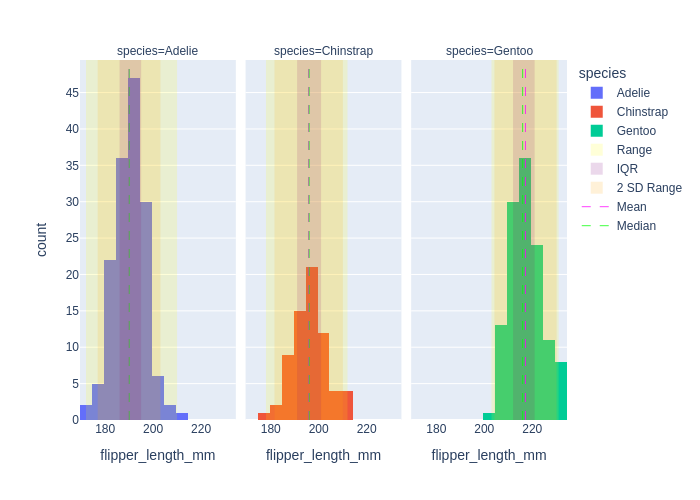

In [218]:
"""
List of major manual changes to the code generated by ChatGPT:
1. faceted the histogram by species (added the argument 'facet_col="species"' to the histogram method call)
2. combined all for loops into a single one, and added the indexing variable "i" to the for loop (via the enumerate function)
3. added argument "col=i+1" to all shape methods to so each method call only draws on its corresponding facet, instead of drawing on all
4. changed all shape methods to no longer use an f-string to include species in the "name" argument
5. introduced new boolean variable "b" which only equals "True" in the first iteration of the for loop and passed "b" into the
   keyword parameter "showlegend" so that there would not be three copies of each statistic added as a label to the legend, but only one
"""

import pandas as pd
import plotly.express as px

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
fig = px.histogram(df, color="species", x="flipper_length_mm", facet_col="species") 
species_stats = df.groupby("species")["flipper_length_mm"].describe()
b = True

for i, species in enumerate(df["species"].unique()):
    
    # 1. Mean
    mean_value = species_stats.loc[species, 'mean']
    
    # 2. Median
    median_value = df[df["species"] == species]["flipper_length_mm"].median()
    
    # 3. Range
    min_value = species_stats.loc[species, 'min']
    max_value = species_stats.loc[species, 'max']
    
    # 4. Interquartile Range (IQR)
    q1 = species_stats.loc[species, '25%']
    q3 = species_stats.loc[species, '75%']
    
    # 5. Range Defined by Two Standard Deviations
    std_dev = species_stats.loc[species, 'std']
    lower_bound = mean_value - 2 * std_dev
    upper_bound = mean_value + 2 * std_dev
    
    

    fig.add_vrect(x0=min_value, x1=max_value, fillcolor="yellow", opacity=0.15, line_width=0, showlegend=b, name="Range", col=i+1)
    fig.add_vrect(x0=q1, x1=q3, fillcolor="purple", opacity=0.15, line_width=0, showlegend=b, name="IQR", col=i+1)
    fig.add_vrect(x0=lower_bound, x1=upper_bound, fillcolor="orange", opacity=0.15, line_width=0, showlegend=b, name="2 SD Range", col=i+1)

    fig.add_vline(x=mean_value, line_dash="dash", line_width=0.75, line_color="fuchsia", showlegend=b, name="Mean", col=i+1)    
    fig.add_vline(x=median_value, line_dash="dash", line_width=0.75, line_color="lime", showlegend=b, name="Median", col=i+1)
    
    b = False
    
fig.show(renderer="png")


##### Question 2

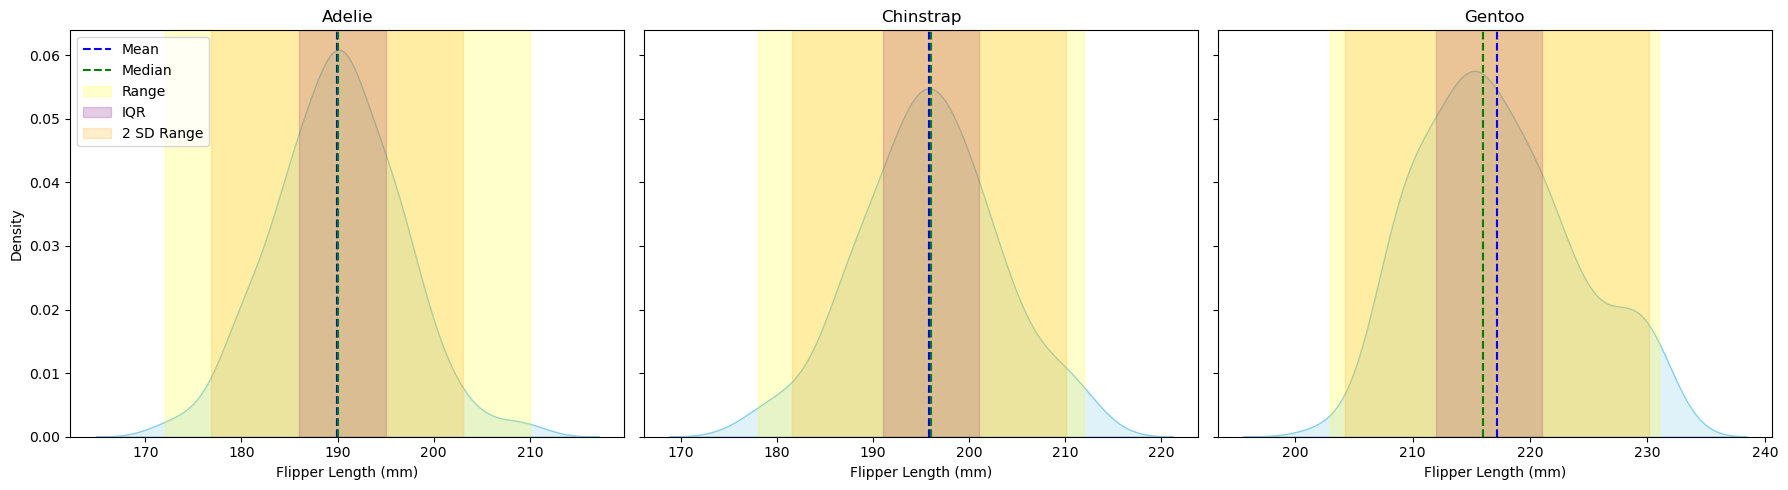

In [212]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
df = df.dropna(subset=["flipper_length_mm"])

# List of unique species
species_list = df['species'].unique()

# Set up the figure with 3 subplots (one for each species)
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharey=True)

# Descriptive statistics for each species
species_stats = df.groupby("species")["flipper_length_mm"].describe()

# Function to add annotations for each statistic
def add_annotations(ax, species, data):
    # Calculate statistics
    mean_value = data.mean()
    median_value = data.median()
    min_value = data.min()
    max_value = data.max()
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    std_dev = data.std()
    lower_2std = mean_value - 2 * std_dev
    upper_2std = mean_value + 2 * std_dev

    # Add vertical lines and spans for the statistics
    ax.axvline(mean_value, color='blue', linestyle='--', label='Mean')
    ax.axvline(median_value, color='green', linestyle='--', label='Median')
    ax.axvspan(min_value, max_value, color='yellow', alpha=0.2, label='Range')
    ax.axvspan(q1, q3, color='purple', alpha=0.2, label='IQR')
    ax.axvspan(lower_2std, upper_2std, color='orange', alpha=0.2, label='2 SD Range')

# Plot KDE for each species and add annotations
for i, species in enumerate(species_list):
    ax = axes[i]
    species_data = df[df["species"] == species]["flipper_length_mm"]
    
    # KDE plot
    sns.kdeplot(species_data, ax=ax, fill=True, color='skyblue')
    
    # Add title and labels
    ax.set_title(f'{species}')
    ax.set_xlabel('Flipper Length (mm)')
    
    # Add statistics annotations
    add_annotations(ax, species, species_data)

# Add legend to the first subplot only
axes[0].legend(loc='upper left')

# Display the plots
plt.tight_layout()
plt.show()

##### Question 3
I prefer histograms out of the three visualization methods because they provide clear and intuitive graphic representations of the frequency distribution of data. The ability to choose the bin width provides flexibility, and though their discrete nature can hide certain points about the data, varying the bin size can help reveal them.

##### Question 4

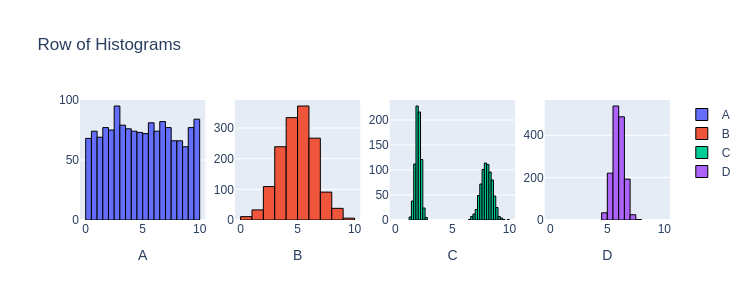

In [213]:
from scipy import stats
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import numpy as np

n = 1500
data1 = stats.uniform.rvs(0, 10, size=n)
data2 = stats.norm.rvs(5, 1.5, size=n)
data3 = np.r_[stats.norm.rvs(2, 0.25, size=int(n/2)), stats.norm.rvs(8, 0.5, size=int(n/2))]
data4 = stats.norm.rvs(6, 0.5, size=n)

fig = make_subplots(rows=1, cols=4)

fig.add_trace(go.Histogram(x=data1, name='A', nbinsx=30, marker=dict(line=dict(color='black', width=1))), row=1, col=1)
fig.add_trace(go.Histogram(x=data2, name='B', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=2)
fig.add_trace(go.Histogram(x=data3, name='C', nbinsx=45, marker=dict(line=dict(color='black', width=1))), row=1, col=3)
fig.add_trace(go.Histogram(x=data4, name='D', nbinsx=15, marker=dict(line=dict(color='black', width=1))), row=1, col=4)

fig.update_layout(height=300, width=750, title_text="Row of Histograms")
fig.update_xaxes(title_text="A", row=1, col=1)
fig.update_xaxes(title_text="B", row=1, col=2)
fig.update_xaxes(title_text="C", row=1, col=3)
fig.update_xaxes(title_text="D", row=1, col=4)
fig.update_xaxes(range=[-0.5, 10.5])

for trace in fig.data:
    trace.xbins = dict(start=0, end=10)
    
# This code was produced by just making requests to Microsoft Copilot
# https://github.com/pointOfive/stat130chat130/blob/main/CHATLOG/wk3/COP/SLS/0001_concise_makeAplotV1.md

fig.show(renderer="png") # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

##### Question 4.1
Datasets A and C have similar means and similar variances.

##### Question 4.2
Datasets A and B have similar means but quite different variances. 

Datasets C and B have similar means but quite different variances.

##### Question 4.3
None of them.

##### Question 4.4
Datasets D and A have quite different means and quite different variances.

Datasets D and B have quite different means and quite different variances.

Datasets D and C have quite different means and quite different variances.

##### Question 5

In a dataset, the value of the mean is more greatly affected by extreme values and outliers in the dataset compared to the median.
This is because the mean is calculated by dividing the sum of all the values by the number of values, while the median is the middle value when the dataset has been ordered.

This means that in a skewed distribution, the mean is typically pulled towards the tail as that is where the extreme values are, while the median is less affected and therefore tends to be a more accurate indicator of the central tendency of the dataset.

The histograms below demonstrate this relationship.

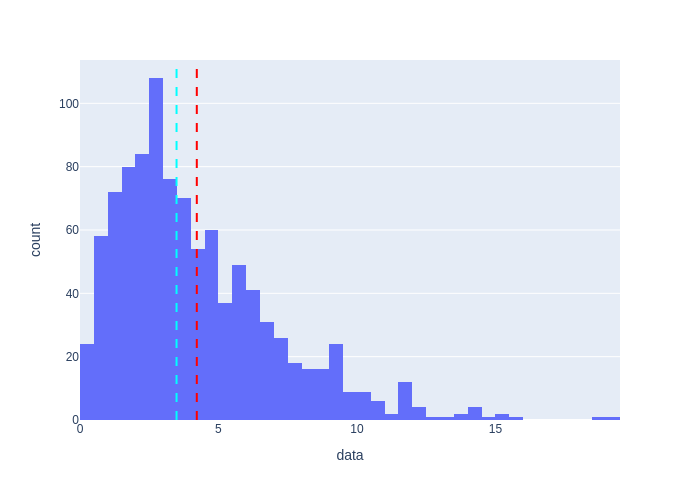

In [214]:
from scipy import stats
import pandas as pd
import numpy as np
  
sample1 = stats.gamma(a=2,scale=2).rvs(size=1000)
fig1 = px.histogram(pd.DataFrame({'data': sample1}), x="data")

mean1 = sample1.mean()
median1 = np.quantile(sample1, [0.5])[0]

fig1.add_vline(x=mean1, line_color='red', line_dash='dash')    
fig1.add_vline(x=median1, line_color='aqua', line_dash='dash')

fig1.show(renderer="png")

This histogram depicts a distribution skewed to the right, with the mean and median being represented by the red and aqua line respectively. The mean is pulled towards the right where the extreme values are, while the median remains closer to the left, being less affected by the outliers.



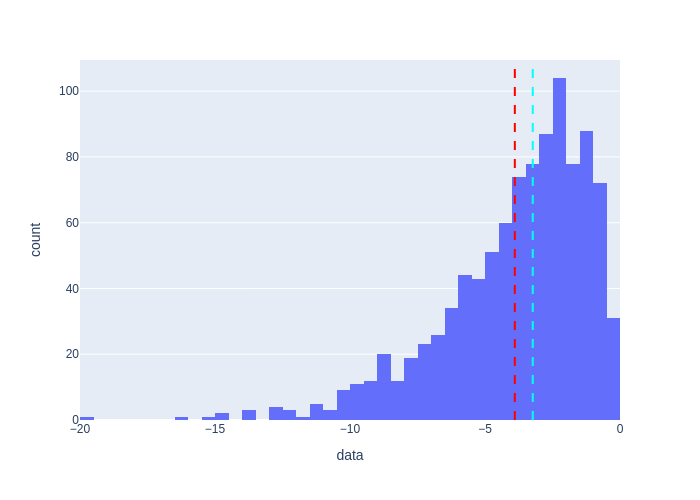

In [215]:
sample2 = -stats.gamma(a=2,scale=2).rvs(size=1000)
fig2 = px.histogram(pd.DataFrame({'data': sample2}), x="data")

mean2 = sample2.mean()
median2 = np.quantile(sample2, [0.5])[0]

fig2.add_vline(x=mean2, line_color='red', line_dash='dash')    
fig2.add_vline(x=median2, line_color='aqua', line_dash='dash')

fig2.show(renderer="png")


On the other hand, this histogram depicts a distribution skewed to the left, with the mean and median still being represented by the red and aqua line respectively. The mean is pulled towards the left where the extreme values are, while the median remains closer to the right, being less affected by the outliers.

##### Question 6

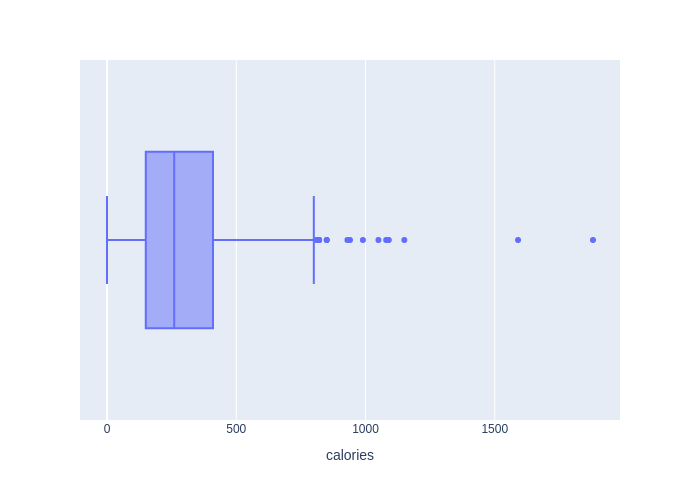

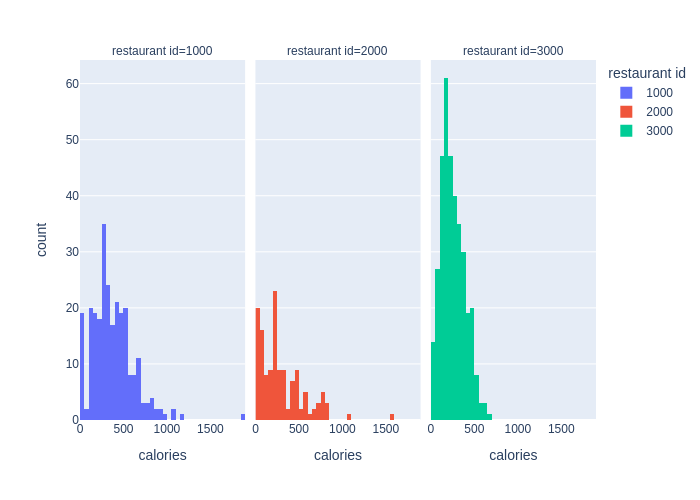

               count   mean         std    min     25%    50%     75%    max
restaurant id                                                               
1000           260.0  129.5   75.199734    0.0   64.75  129.5  194.25  259.0
2000           135.0  327.0   39.115214  260.0  293.50  327.0  360.50  394.0
3000           355.0  572.0  102.623909  395.0  483.50  572.0  660.50  749.0


,restaurant id,category id,item id,serving size (oz),calories,calories from fat,total fat (g),total fat (% daily value),saturated fat (g),saturated fat (% daily value),...,carbohydrates (g),carbohydrates (% daily value),dietary fiber (g),dietary fiber (% daily value),sugars (g),protein (g),vitamin a (% daily value),vitamin c (% daily value),calcium (% daily value),iron (% daily value)
0,1000,100,0,4.8,300,120.0,13.0,20.0,5.0,25.0,...,31,10.0,4,17.0,3.0,17.0,10.0,0.0,25.0,15.0
1,1000,100,1,4.8,250,70.0,8.0,12.0,3.0,15.0,...,30,10.0,4,17.0,3.0,18.0,6.0,0.0,25.0,8.0
2,1000,100,2,3.9,370,200.0,23.0,35.0,8.0,42.0,...,29,10.0,4,17.0,2.0,14.0,8.0,0.0,25.0,10.0
3,1000,100,3,5.7,450,250.0,28.0,43.0,10.0,52.0,...,30,10.0,4,17.0,2.0,21.0,15.0,0.0,30.0,15.0
4,1000,100,4,5.7,400,210.0,23.0,35.0,8.0,42.0,...,30,10.0,4,17.0,2.0,21.0,6.0,0.0,25.0,10.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,3000,130,745,NaN,180,NaN,14.0,NaN,NaN,NaN,...,12,NaN,3,NaN,NaN,4.0,NaN,NaN,NaN,NaN
746,3000,130,746,NaN,190,NaN,18.0,NaN,NaN,NaN,...,6,NaN,3,NaN,NaN,7.0,NaN,NaN,NaN,NaN
747,3000,100,747,NaN,340,NaN,13.0,NaN,NaN,NaN,...,38,NaN,0,NaN,NaN,18.0,NaN,NaN,NaN,NaN
748,3000,100,748,NaN,90,NaN,8.0,NaN,NaN,NaN,...,5,NaN,4,NaN,NaN,1.0,NaN,NaN,NaN,NaN


In [203]:
import pandas as pd
import plotly.express as px

df = pd.read_csv("https://raw.githubusercontent.com/manuelamc14/fast-food-Nutritional-Database/main/Tables/nutrition.csv")
# Use summary statistics and visualizations to understand and demonstate some interesting aspects of the data

fig1 = px.box(df, x="calories")
fig2 = px.histogram(df, color="restaurant id", x="calories", facet_col="restaurant id")

fig1.show(renderer="png")
fig2.show(renderer="png")
print(df.groupby("restaurant id")["item id"].describe())
df

##### Question 7

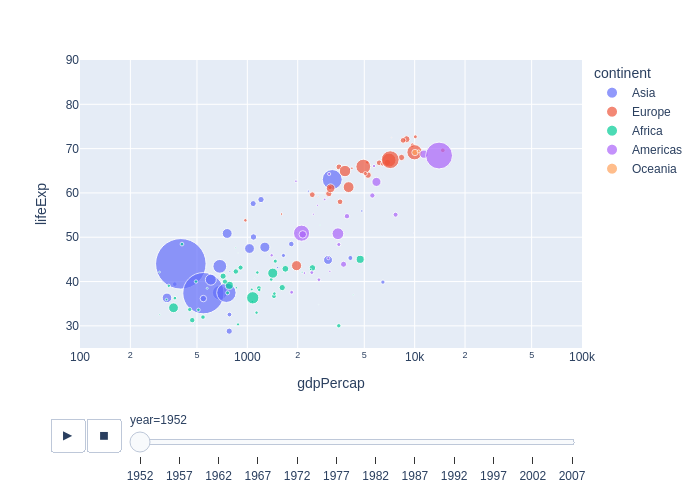

In [216]:
import plotly.express as px

df = px.data.gapminder()
fig = px.scatter(df, x="gdpPercap", y="lifeExp", animation_frame="year", animation_group="country",
           size="pop", color="continent", hover_name="country",
           log_x=True, size_max=55, range_x=[100,100000], range_y=[25,90])

fig.show(renderer='png')

##### Question 8

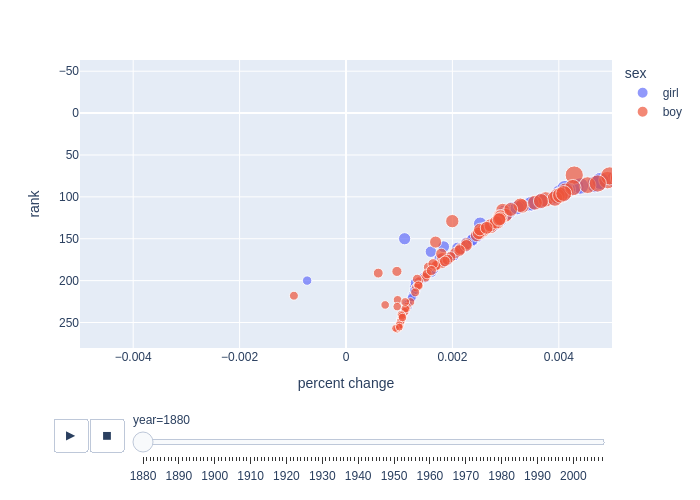

In [217]:
import pandas as pd
import plotly.express as px

bn = pd.read_csv('https://raw.githubusercontent.com/hadley/data-baby-names/master/baby-names.csv')

bn['name'] = bn['name']+" "+bn['sex'] # make identical boy and girl names distinct
bn['rank'] = bn.groupby('year')['percent'].rank(ascending=False)
bn = bn.sort_values(['name','year'])

# the next three lines create the increaes or decrease in name prevalence from the last year 
bn['percent change'] = bn['percent'].diff()
new_name = [True]+list(bn.name[:-1].values!=bn.name[1:].values)
bn.loc[new_name,'percentage change'] = bn.loc[new_name,'percent'] 

bn = bn.sort_values('year')
bn = bn[bn.percent>0.001] # restrict to "common" names

fig = px.scatter(bn, x="percent change", y="rank", animation_frame="year", animation_group="name",
                 size="percent", color="sex", hover_name="name", size_max=50, range_x=[-0.005,0.005])


fig.update_yaxes(autorange='reversed') # this lets us put rank 1 on the top

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

##### Question 9
Yes.